# Spectroscopy Lab



##### Let's import the packages we will need:

In [1]:
from astropy.io import fits as pyfits
from astropy import units as u

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from glob import glob

## Data Wrangling

Let's open the low resolution mercury-argon spectrum. Remember to change the path name to where your data is stored.

In [2]:
TestSpectrumLoResFiles = {"Sun" : "../../data/spectra/sun-low-56.fit",
                          "Hg"  : "../../data/spectra/hg-low-56.fit"}

TestSpectrumHiResFiles = {"Sun" : {4.0 : '../../data/spectra/sun-high-40.fit',
                                   4.4 : '../../data/spectra/sun-high-44.fit'},
                          "Hg"  : {4.0 : '../../data/spectra/hg-high-40.fit',
                                   4.4 : '../../data/spectra/hg-high-44.fit'}}

Micrometer = [4.0, 4.4]

In [3]:
hdu = pyfits.open(TestSpectrumLoResFiles['Hg'])

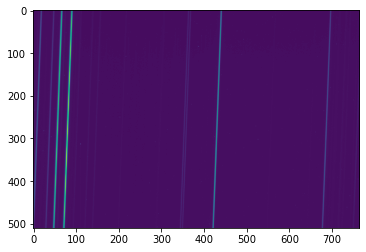

In [4]:
image_hdu = hdu[0]
spec_data = image_hdu.data
plt.imshow(spec_data)

You can see that this image is 2 dimensional, but that along the y-axis there is very little variablility. In order to cut this image to a 1-D array, we will take 10 of the central rows of data and average them so we get a good reading of the pixels. Too many rows and the slight tilt will broaden the summed lines; too few and the data will be unnecessarily noisy.


In [5]:
#first we get the central 10 rows of the image
print(spec_data.shape)
img_cut = spec_data[250:260]
plt.imshow(img_cut)
plt.axis('off')

(510, 765)


(-0.5, 764.5, 9.5, -0.5)

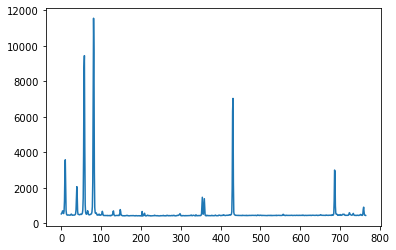

In [6]:
#then we average those ten rows so we get an accurate spectrum.
spectrum = np.average(img_cut, axis=0)
plt.plot(spectrum)

In [7]:
# turn the previous code into a function
# Flip the spectrum so that wavelength increases going from left to right
def spectrum(img_data, row_min, row_max):
    return np.flip(np.average(img_data[row_min:row_max,:], axis=0))

### Let's do this for all of the spectra

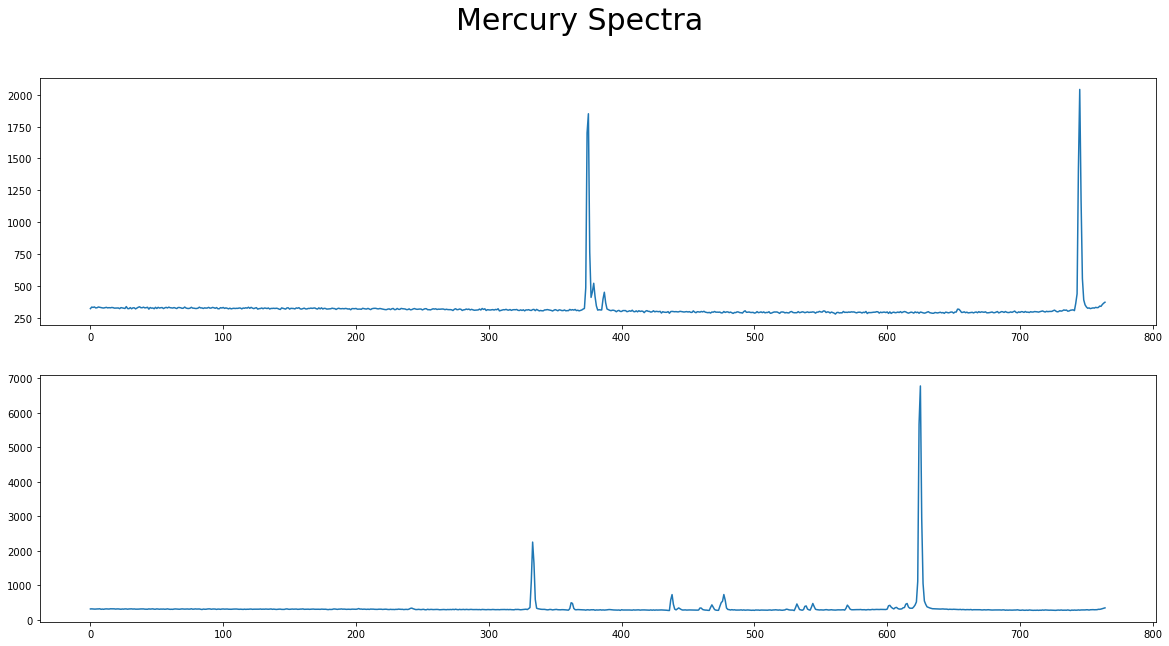

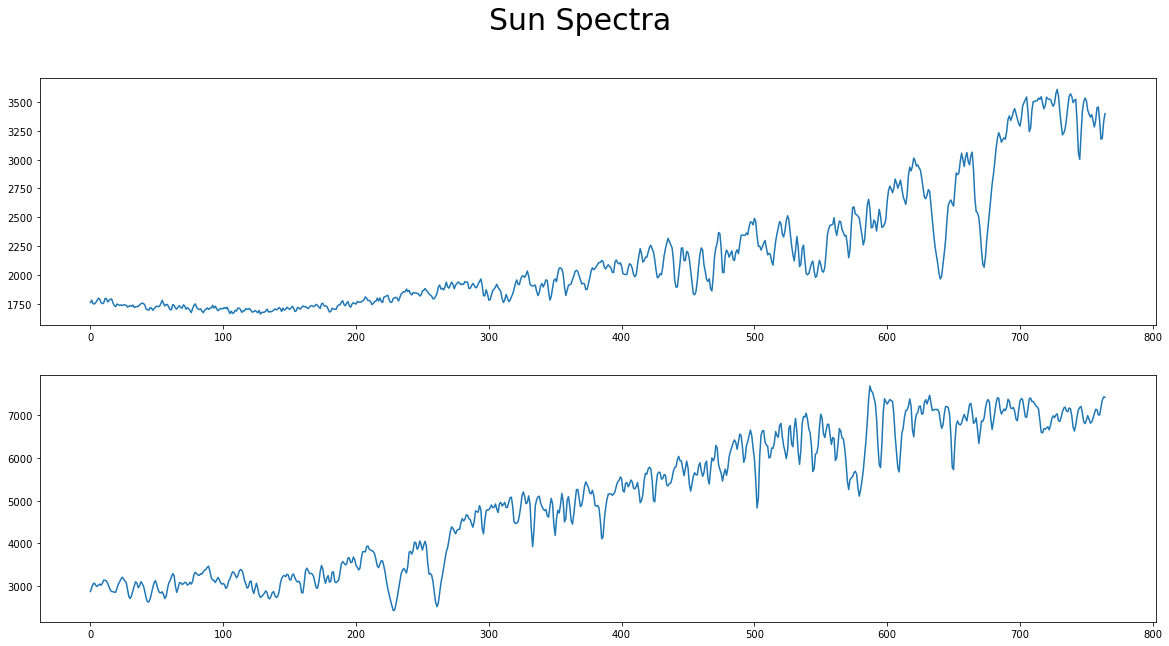

In [8]:
#getting the mercury spectra
Hg_spectra = []
Sun_spectra = []
for microm in Micrometer:
    Hg_hdu = pyfits.open(TestSpectrumHiResFiles['Hg'][microm])
    Sun_hdu = pyfits.open(TestSpectrumHiResFiles['Sun'][microm])
    Hg_spec_data = Hg_hdu[0].data
    Sun_spec_data = Sun_hdu[0].data
    Hg_spectra.append(spectrum(Hg_spec_data, 250, 260))
    Sun_spectra.append(spectrum(Sun_spec_data, 250, 260))
    
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
im1=ax1.plot(Hg_spectra[0])
im2=ax2.plot(Hg_spectra[1])
plt.suptitle("Mercury Spectra", fontsize=30)
plt.show()
    
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
im1=ax1.plot(Sun_spectra[0])
im2=ax2.plot(Sun_spectra[1])
plt.suptitle("Sun Spectra", fontsize=30)
plt.show()
